# Simulate synthetic bulk RNA-seq gene expression data

Nuha BinTayyash, 2020

This notebook shows how to simulate four counts time course datasets with two levels of mean expression (high/low) and two levels of dispersion (high/low) to assess the performance of GPcounts in identifying differentially expressed genes using a one-sample test. Each dataset has $600$ genes with $3$ replicate time-series measured at $6$ time points. Half of the genes are differentially expressed across time. We use two classes of generative functions $f$ (sine functions and cubic splines) to simulate differentially expressed genes. The sine functions are of the form $f(x) = a\sin(xb+d)+c$ with $x\in[0,1]$. The cubic spline function has the form $f(x) \in C^2[0,1]$ passing through $n = 4$ data points $(x,y)$ where $x \in [0,1]$ and $y \in [-1,1+a]+c$. The simulation parameters $[a, b, d]$ are drawn from uniform distributions to vary the amplitude, lengthscale and phase. The $c$  parameter is used to vary the mean and $c=2$ for low counts mean and $c=7$ for high counts mean. For non-differentially expressed genes we choose constant values which are drawn at random from the dynamic functions. The low and high dispersion values are drawn from uniform distributions $\alpha_\mathrm{low} = U[0.01,0.1]$ and $\alpha_\mathrm{high} = U[1,3]$. An exponential inverse-link function is used to determine the mean of count data at each time $\mu(x) = e^{f(x)}$ and we use the Scipy library~(\citealp{millman2011python}) to sample counts from the negative binomial distribution. 
 
Bulk_simulator.py used to simulated four datasets with two levels of the mean of count data (high count and low count datasets) and two levels of dispersion (high dispersion and low dispersion).



  0%|          | 0/2 [00:00<?, ?it/s]

[0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0]
a [1.29288102]
b [4.61450063]
c 2
d [2.74944154]
alpha [0.09025957]


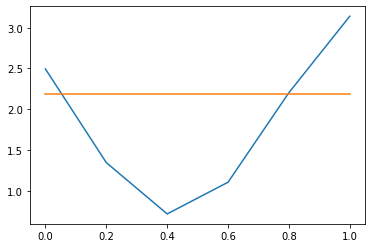

a [1.31315482]
b [2.0434204]
c 2
d [0.10323041]
alpha [0.09365764]


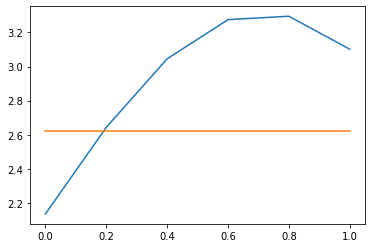

a [1.55338251]
b [3.71702632]
c 2
d [2.52404058]
alpha [0.03235721]


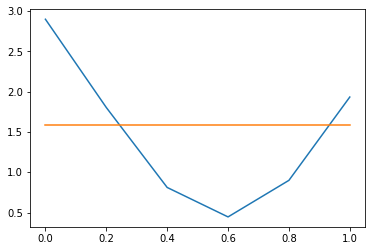

a [3.26439274]
b [5.6176898]
c 2
d [2.88086036]
alpha [0.05001286]


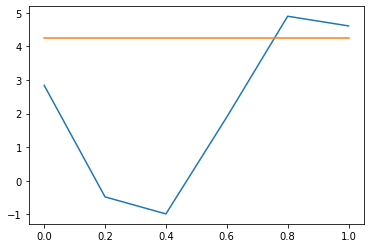

a [3.41889788]
b [5.43506102]
c 2
d [1.87356644]
alpha [0.02358414]


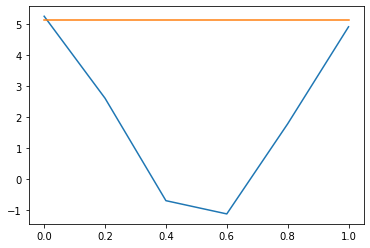

a [0.1465473]
b [1.7364842]
c 2
d [5.69401994]
alpha [0.08347279]


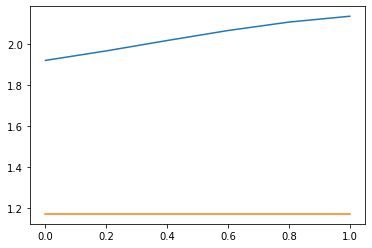

a [-0.20749813]
b [6.02024681]
c 2
d [2.49197483]
alpha [0.01960142]


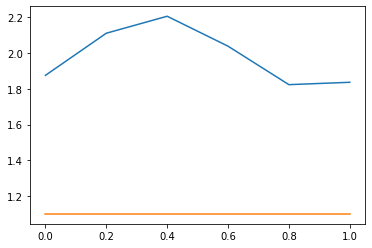

a [0.55956346]
b [5.46199587]
c 2
d [5.1422981]
alpha [0.01724037]


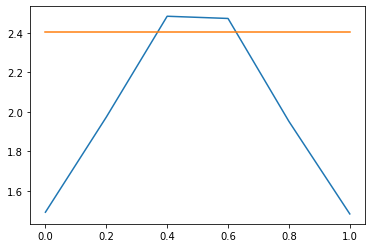

a [1.69971066]
b [4.68256865]
c 2
d [2.60399624]
alpha [0.08121534]


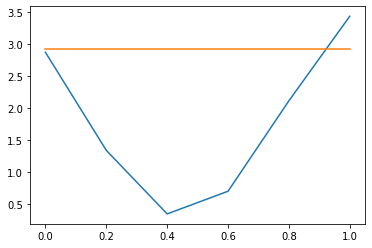

a [3.55759528]
b [6.22397409]
c 2
d [0.08579945]
alpha [0.06509628]


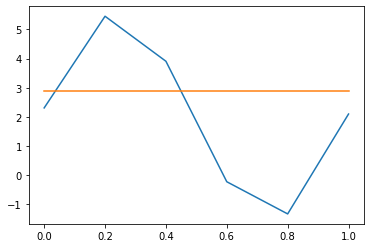

low_counts_low_dispersion
a [1.29288102]
b [4.61450063]
c 2
d [2.74944154]
alpha [2.783546]


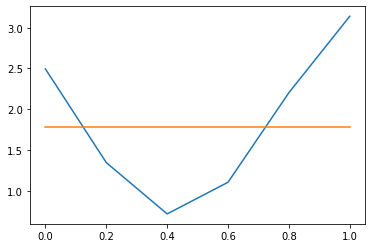

a [0.60649975]
b [1.68709209]
c 2
d [0.4225419]
alpha [2.35878555]


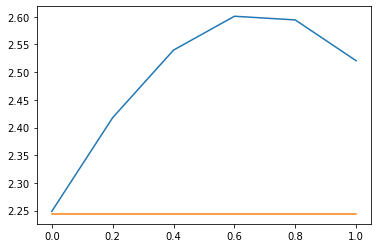

a [3.6718092]
b [4.46639304]
c 2
d [0.20781379]
alpha [1.03121213]


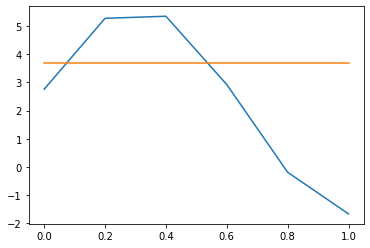

a [3.44639774]
b [3.00546602]
c 2
d [6.27038175]
alpha [1.72437812]


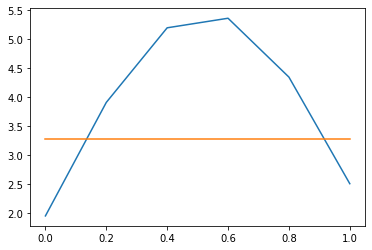

a [0.26443944]
b [5.80036696]
c 2
d [4.83784651]
alpha [1.7148493]


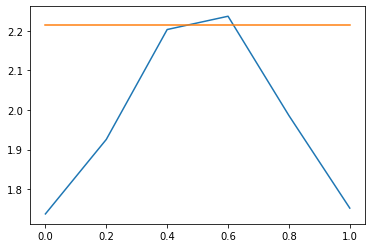

a [-1.81603371]
b [2.92581787]
c 2
d [2.86955351]
alpha [1.04190014]


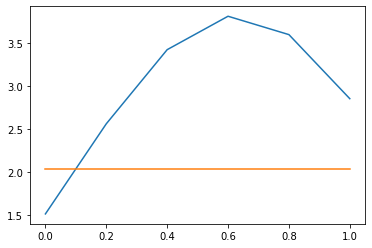

a [-1.37158336]
b [4.70075145]
c 2
d [2.5238813]
alpha [1.1715892]


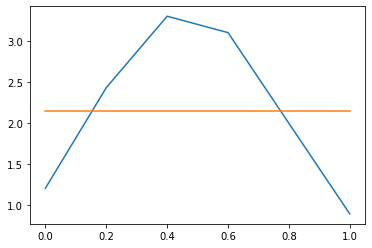

a [1.85682025]
b [3.99657916]
c 2
d [0.88240754]
alpha [2.42578461]


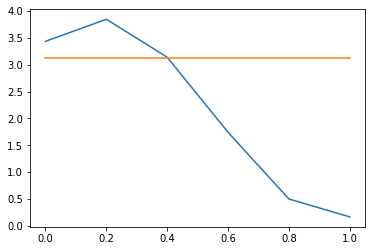

a [1.57710668]
b [4.84753936]
c 2
d [0.58340138]
alpha [1.33308415]


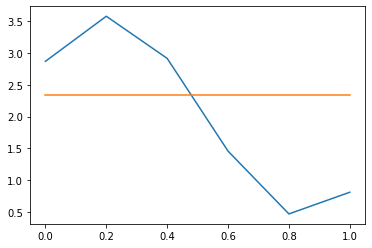

a [3.19126878]
b [3.21583167]
c 2
d [1.22015819]
alpha [1.82626954]


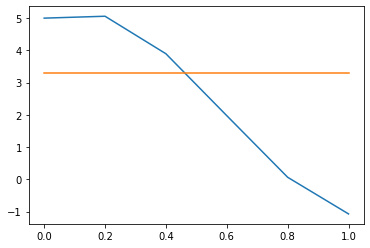

 50%|█████     | 1/2 [00:16<00:16, 16.92s/it]

low_counts_high_dispersion
a [1.29288102]
b [4.61450063]
c 7
d [2.74944154]
alpha [0.09025957]


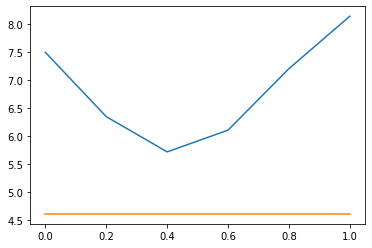

a [3.56848776]
b [4.29092197]
c 7
d [1.49472468]
alpha [0.09407926]


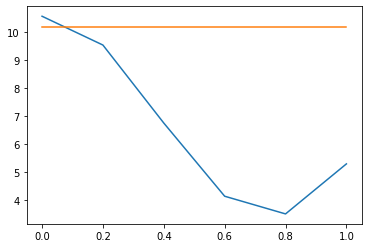

a [1.87342147]
b [4.78178289]
c 7
d [1.74418772]
alpha [0.02159745]


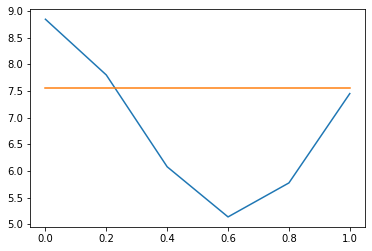

a [3.27540858]
b [1.60794929]
c 7
d [2.34161166]
alpha [0.05774835]


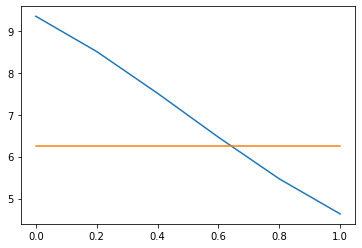

a [1.20950113]
b [1.66091086]
c 7
d [3.2556313]
alpha [0.08584992]


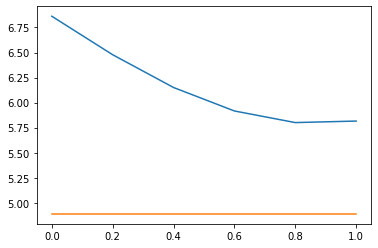

a [0.95135339]
b [3.062468]
c 7
d [2.80781077]
alpha [0.04897697]


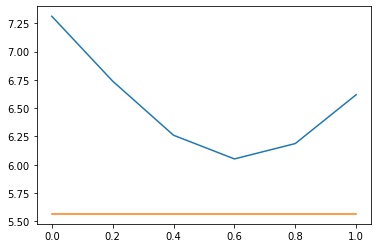

a [-1.85436377]
b [6.1380714]
c 7
d [1.66901852]
alpha [0.01121578]


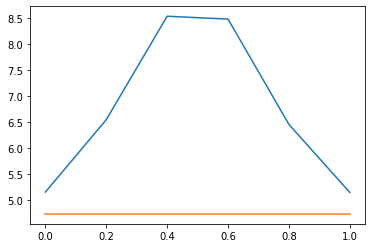

a [1.39786963]
b [1.59273173]
c 7
d [2.66943592]
alpha [0.06977774]


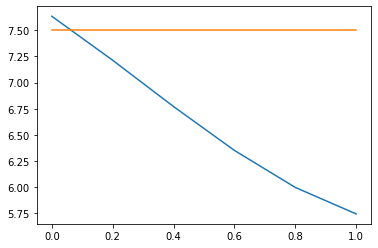

a [-0.11845633]
b [5.86920643]
c 7
d [0.74361142]
alpha [0.01226713]


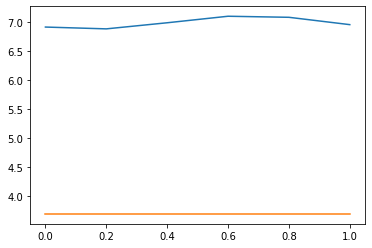

a [-0.02627744]
b [4.5316555]
c 7
d [4.83672706]
alpha [0.07920275]


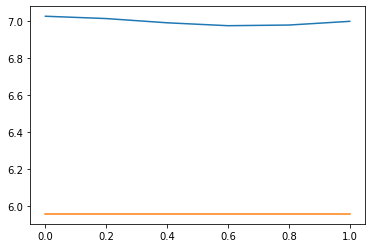

high_counts_low_dispersion
a [1.29288102]
b [4.61450063]
c 7
d [2.74944154]
alpha [2.783546]


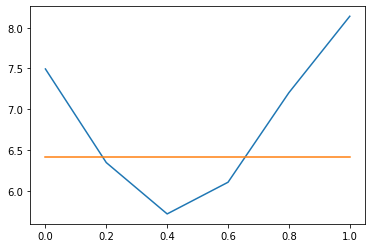

a [-1.67397207]
b [3.19822778]
c 7
d [5.83130675]
alpha [2.4088288]


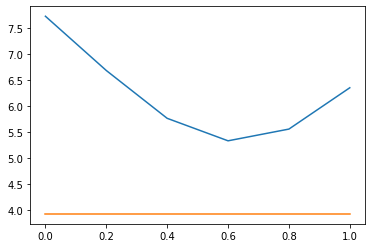

a [-0.81767432]
b [4.01574936]
c 7
d [1.92774471]
alpha [2.1550859]


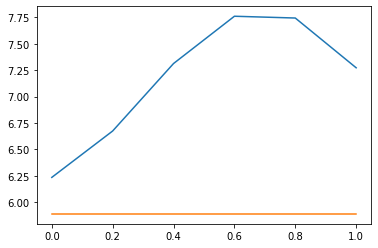

a [3.27540858]
b [1.60794929]
c 7
d [2.34161166]
alpha [2.06107443]


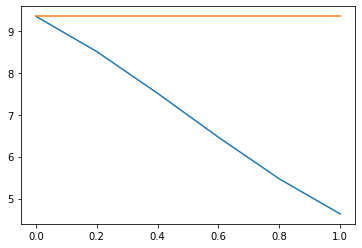

a [1.10889888]
b [1.97281458]
c 7
d [1.3910749]
alpha [1.20002812]


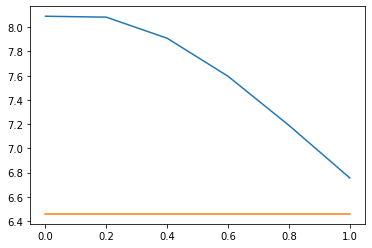

a [3.24134096]
b [3.10830575]
c 7
d [1.98889556]
alpha [1.89375393]


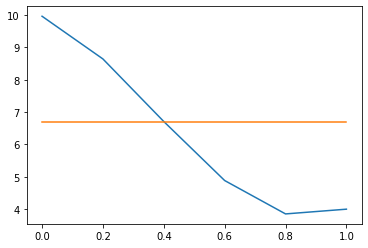

a [-1.85436377]
b [6.1380714]
c 7
d [1.66901852]
alpha [1.02701741]


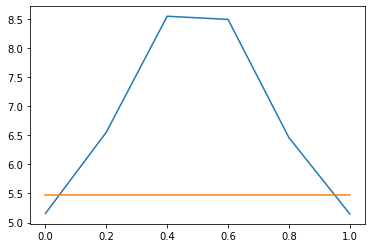

a [2.54443933]
b [2.12006585]
c 7
d [2.24711233]
alpha [1.00930967]


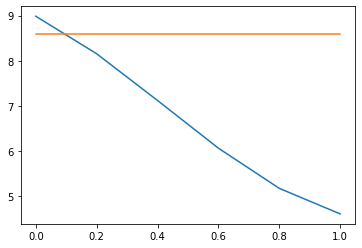

a [3.39182601]
b [2.1461112]
c 7
d [1.63111637]
alpha [1.12015593]


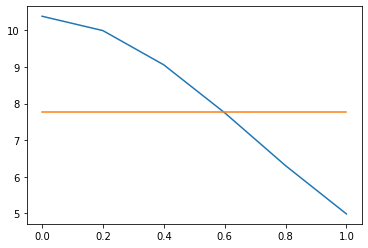

a [1.76988298]
b [6.18427659]
c 7
d [5.64748541]
alpha [2.17343433]


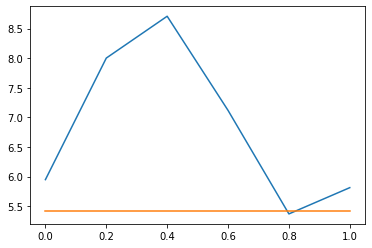

100%|██████████| 2/2 [00:30<00:00, 15.29s/it]

high_counts_high_dispersion


In [1]:
%run ./Bulk_simulator.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Filter datasets to have mean counts higher than .5 and lower than 250 for low counts dataset and lower than 20000 for high counts dataset 

In [3]:
def filter_counts(counts,min_value,max_value):
    print('shape',counts.shape)
    counts = counts.T
    filtered_counts = counts.loc[:,(counts.mean(0) > min_value) & (counts.mean(0) <= max_value)]
    filtered_counts = filtered_counts.T
    print('shape',filtered_counts.shape)
    histogram(filtered_counts)
    return filtered_counts

def histogram(counts):
    n, bins, patches = plt.hist(counts.mean(1), facecolor='g')
    plt.grid(True)
    plt.show()

def get_common_genes_between_two_ts(first_ts,second_ts):
    shared_index = first_ts.index.intersection(second_ts.index)
    first_ts = first_ts.loc[shared_index]
    second_ts = second_ts.loc[shared_index]
    return first_ts,second_ts

../data/low_counts_low_dispersion
../data/low_counts_low_dispersion
differentially expressed genes
shape (10, 18)
shape (10, 18)


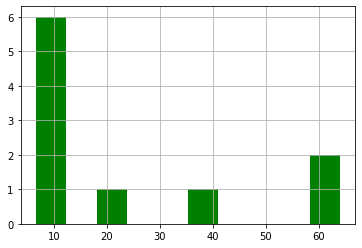

non differentially expressed genes
shape (10, 18)
shape (10, 18)


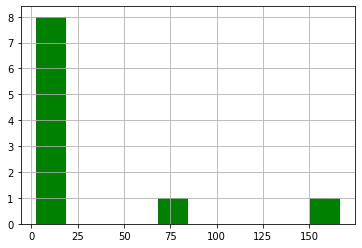

shape (20, 18)
shape (20, 18)
2.3333333333333335
166.72222222222223
../data/low_counts_high_dispersion
../data/low_counts_high_dispersion
differentially expressed genes
shape (10, 18)
shape (10, 18)


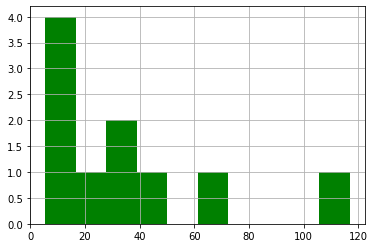

non differentially expressed genes
shape (10, 18)
shape (10, 18)


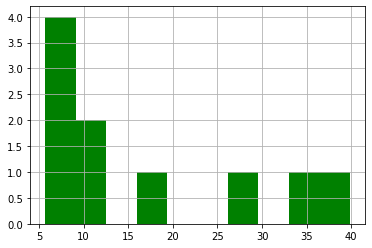

shape (20, 18)
shape (20, 18)
5.5
116.88888888888889
../data/high_counts_low_dispersion
differentially expressed genes
shape (10, 18)
shape (10, 18)


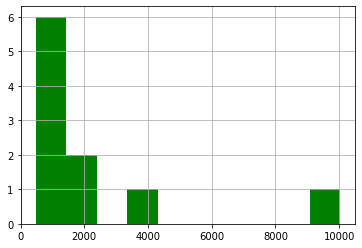

non differentially expressed genes
shape (10, 18)
shape (9, 18)


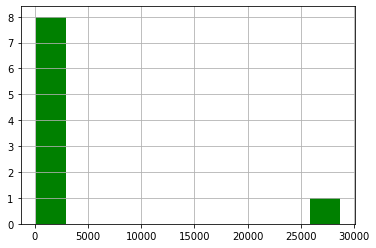

shape (18, 18)
shape (18, 18)
104.38888888888889
28696.88888888889
../data/high_counts_high_dispersion
differentially expressed genes
shape (10, 18)
shape (10, 18)


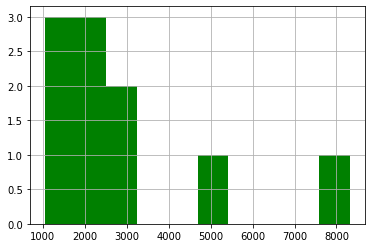

non differentially expressed genes
shape (10, 18)
shape (9, 18)


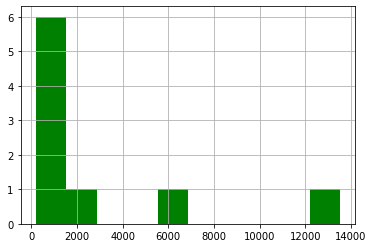

shape (18, 18)
shape (18, 18)
190.44444444444446
13534.5


In [4]:
filesname = ['../data/low_counts_low_dispersion'
             ,'../data/low_counts_high_dispersion'                                      
             ,'../data/high_counts_low_dispersion'
             ,'../data/high_counts_high_dispersion']

max_mean_count = [250., 30000.] 
min_mean_count = [0.,100.] 
count = 0

for filename in filesname:
    print(filename)
    DE_samples = pd.read_csv(filename+'.csv',index_col=[0])
    Non_DE_samples = DE_samples.iloc[int(DE_samples.shape[0]/2)::,:]
    DE_samples = DE_samples.iloc[0:int(DE_samples.shape[0]/2),:] 
  
    if filename.find('low_counts') != -1:
        print(filename)
        max_num = max_mean_count[0]
        min_num = min_mean_count[0]
    else:
        max_num = max_mean_count[1]
        min_num = min_mean_count[1]
    print('differentially expressed genes')    
    DE_samples_filtered = filter_counts(DE_samples,min_num,max_num)
    print('non differentially expressed genes')
    Non_DE_samples_filtered = filter_counts(Non_DE_samples,min_num,max_num)
    
    DE_samples_filtered,Non_DE_samples_filtered = get_common_genes_between_two_ts(DE_samples_filtered,Non_DE_samples_filtered)
    
    DE_non_DE = DE_samples_filtered
    DE_non_DE = DE_non_DE.T
    # create a dataframe that have differentially expressed genes followed by non differentially expressed genes
    for i in range(Non_DE_samples_filtered.shape[0]):
        DE_non_DE.insert(i+i+1,Non_DE_samples_filtered.index.values[i] ,Non_DE_samples_filtered.iloc[[i]].values.T,True)
    DE_non_DE = DE_non_DE.T
    
    if 'low_counts_low_dispersion' in filename:
        gene_name = 'gene_1_%s'
   
    if 'low_counts_high_dispersion' in filename:
        gene_name = 'gene_2_%s'
    
    if 'high_counts_low_dispersion' in filename:
        gene_name = 'gene_3_%s'
        
    if 'high_counts_high_dispersion' in filename:
        gene_name = 'gene_4_%s'
        
    genes = [gene_name % (s+1) for s in range(DE_non_DE.shape[0])] 
    DE_non_DE.index = genes
    print('shape',DE_non_DE.shape)
    DE_non_DE.iloc[0:600,:].to_csv(filename+'.csv')
    print('shape',DE_non_DE.iloc[0:600,:].shape)
    print(np.min(DE_non_DE.iloc[0:600,:].mean(1)))
    print(np.max(DE_non_DE.iloc[0:600,:].mean(1)))
    #print('shape',DE_non_DE.shape)
    #print(np.min(DE_non_DE.mean(1)))
    #print(np.max(DE_non_DE.mean(1)))
    